# Rendimiento Relativo
---

In [1]:
%load_ext autoreload
%autoreload 2
# import modules

import indicators

import pandas as pd 
import numpy as np
import yfinance as yf

import os
from datetime import date
from datetime import datetime

In [2]:
folderPath_rsrc = '/Resources/'
folderPath_results = '/Results/'
cwd = os.getcwd()
path_rsrc = cwd + folderPath_rsrc
path_results = cwd + folderPath_results
# read data
ETFs = pd.read_excel(path_rsrc + "ETFs list.xlsx")

In [3]:
ETFs

,Technology,Energy,Telecom,Consumer Discretionary,Real Estate,Industrials,Utilities,Materials,Healthcare,Consumer Staples,Financials
0,AAPB,ACES,FCOM,AMZD,BBRE,AIRR,BLLD,ALUM,AGNG,CHIS,BDCX
1,AAPD,AMJ,IXP,AMZU,BLDG,AQWA,CHIU,BATT,ARKG,CLIX,BDCZ
2,AAPU,AMLP,IYZ,BAD,BYRE,ARKX,ECLN,CHIM,BBC,EATV,BIZD
3,AIQ,AMNA,LTL,BEDZ,CHIR,AWAY,EMIF,CIRC,BBH,EATZ,BNKD
4,ARKK,AMND,NXTG,BETZ,DFGR,BDRY,FUTY,COPX,BBP,ECON,BNKU
...,...,...,...,...,...,...,...,...,...,...,...
163,XPND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,XSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,XSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,XT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sector = "Energy"
energy = ETFs[sector]
energy.dropna(inplace=True)
energy = energy.to_list()

## Descargar datos

In [5]:
energy[:5]

['ACES', 'AMJ', 'AMLP', 'AMNA', 'AMND']

In [6]:
# Descargar data diaria
end_ = date.today()  # yyyy-mm-dd
meses_atras = 3  # 3 is fine due we need at least 50 cnadles data.
if end_.day == 31:
    start_ = datetime(end_.year, end_.month - meses_atras, 30)
else:
    start_ = datetime(end_.year, end_.month - meses_atras, end_.day)

data = yf.download(energy, start=start_, end=end_, interval="1d")

[*********************100%%**********************]  86 of 86 completed


In [7]:
close_df = data.Close

In [8]:
close_df.head()

,ACES,AMJ,AMLP,AMNA,AMND,AMTR,AMUB,AMZA,ATMP,BNE,...,TPYP,UMI,USAI,VCLN,VDE,VMAT,WNDY,XES,XLE,XOP
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-10,43.020000,23.879999,40.259998,37.851002,38.785999,50.409000,15.061,33.410000,20.940001,25.219999,...,25.389999,35.624001,27.950001,19.511000,123.910004,27.087999,14.85,93.779999,88.540001,147.070007
2023-08-11,42.650002,24.120001,40.770000,38.112999,39.091000,50.724998,15.191,33.669998,21.139999,24.898001,...,25.481001,35.888000,28.148001,19.450001,125.680000,26.938999,14.52,94.639999,89.900002,148.809998
2023-08-14,42.700001,23.980000,40.639999,37.791000,38.827999,50.396000,15.108,33.549999,21.000000,24.681000,...,25.280001,35.571999,27.886999,19.481001,125.089996,27.106001,14.55,93.529999,89.519997,147.770004
2023-08-15,41.369999,23.770000,40.180000,37.335999,38.358002,49.835999,14.996,33.130001,20.850000,24.165001,...,24.997999,35.162998,27.601999,18.865999,122.500000,26.827999,14.18,91.870003,87.660004,145.000000
2023-08-16,40.759998,23.799999,40.200001,37.175999,38.326000,49.620998,15.004,33.160000,20.790001,23.773001,...,24.945000,35.008999,27.431000,18.702999,121.529999,26.649000,14.11,91.480003,86.900002,144.350006


## 1. Last 50 days mean
---

### i. Calculate SMA (50 days)

In [9]:
days = 50
sma = indicators._sma(close_df, period=days)

In [10]:
sma

,ACES,AMJ,AMLP,AMNA,AMND,AMTR,AMUB,AMZA,ATMP,BNE,...,TPYP,UMI,USAI,VCLN,VDE,VMAT,WNDY,XES,XLE,XOP
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,36.07228,24.4854,41.8908,37.55318,38.95616,50.23754,15.41560,34.6311,20.9342,22.12288,...,24.87158,35.35062,27.56026,17.06834,125.2338,26.19364,12.66956,93.6924,89.2582,147.473599
2023-11-06,35.89548,24.5228,41.9426,37.56516,38.97664,50.26928,15.43878,34.6737,20.9518,22.06938,...,24.87438,35.36802,27.56936,17.02156,125.1920,26.19234,12.64016,93.6510,89.2204,147.428199
2023-11-07,35.71008,24.5528,41.9832,37.56242,38.98384,50.28114,15.45774,34.6995,20.9624,22.00656,...,24.86978,35.37850,27.56784,16.96884,125.0742,26.18814,12.60484,93.4982,89.1328,147.284399


### ii. Price porcentual deviation from 50 days mean

In [11]:
pm = indicators._PM(prices_df=close_df, sma_df=sma)

In [12]:
pm

,ACES,AMJ,AMLP,AMNA,AMND,AMTR,AMUB,AMZA,ATMP,BNE,...,TPYP,UMI,USAI,VCLN,VDE,VMAT,WNDY,XES,XLE,XOP
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,-0.110120,0.049605,0.043666,0.020020,0.024434,0.030683,0.050559,0.039817,0.036581,-0.053423,...,0.024462,0.030477,0.023938,-0.039743,-0.024305,0.015170,-0.014173,-0.038022,-0.028885,0.000993
2023-11-06,-0.131646,0.042295,0.033317,0.012135,0.017045,0.022334,0.042116,0.033925,0.028551,-0.051854,...,0.014297,0.023976,0.014242,-0.046386,-0.037638,0.013617,-0.011880,-0.058526,-0.039457,-0.025356
2023-11-07,-0.131618,0.029211,0.024934,0.000095,0.006879,0.009782,0.030422,0.014424,0.017059,-0.060598,...,0.003226,0.010303,0.001928,-0.053913,-0.060078,0.016109,-0.023788,-0.104368,-0.059830,-0.052038


## 2. Overbought and Oversold
---

### i. Relative Strenght Index (RSI)

In [13]:
days_ = 14
# https://www.macroption.com/rsi-calculation/

In [74]:
def _rsi(data, periods=14):
    """
    data: pandas DataFrame
        Close prices.
    """
    change = data.diff()
    # gain = [i if i>=0 else 0.0 for i in change]
    # loss = [i if i<0 else 0.0 for i in change]
    
    gain = change.apply(lambda x: x if x>=0 else 0.0)
    loss = change.apply(lambda x: x if x<0 else 0.0)
    
    avgGain = gain.ewm(span=periods, min_periods=periods).mean()
    avgLoss = loss.ewm(span=periods, min_periods=periods).mean()
    
    rs = avgGain / avgLoss
    rsi = 100 - (100/(rs + 1))
    
    return gain

In [75]:
_rsi(close_df["ACES"])

Date
2023-08-10    0.000000
2023-08-11    0.000000
2023-08-14    0.049999
2023-08-15    0.000000
2023-08-16    0.000000
                ...   
2023-11-03    0.769999
2023-11-06    0.000000
2023-11-07    0.000000
2023-11-08    0.000000
2023-11-09    0.000000
Name: ACES, Length: 65, dtype: float64

<Axes: xlabel='Date'>

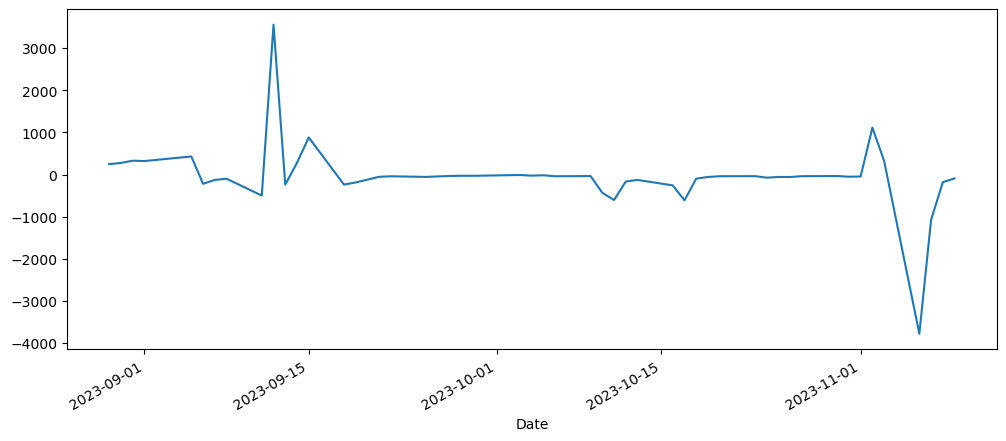

In [72]:
_rsi(close_df["ACES"]).plot(figsize=(12,5))

<Axes: xlabel='Date'>

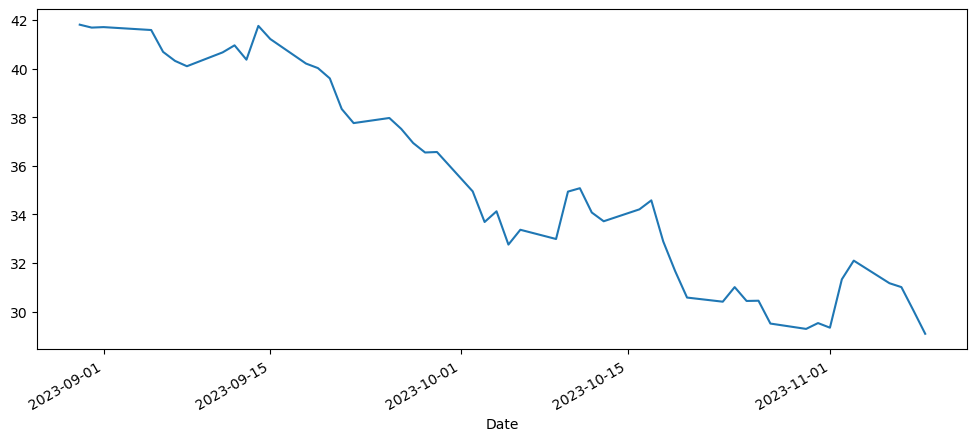

In [71]:
close_df["ACES"].iloc[14:].plot(figsize=(12,5))

In [113]:
def RSIcalc(asset, periods=14):
    change = asset.pct_change()  # primer valor es nan
    upmove = change.apply(lambda x: x if x >= 0 else 0.0)
    downmove = change.apply(lambda x: x if x < 0 else 0.0)
    
    avgUp = upmove.ewm(span=periods).mean()
    avgDown = downmove.ewm(span=periods).mean()
    
    rs = avgUp / avgDown
    rsi = rs.apply(lambda x: 100-(100/(x+1)))
    
    return rsi

<Axes: xlabel='Date'>

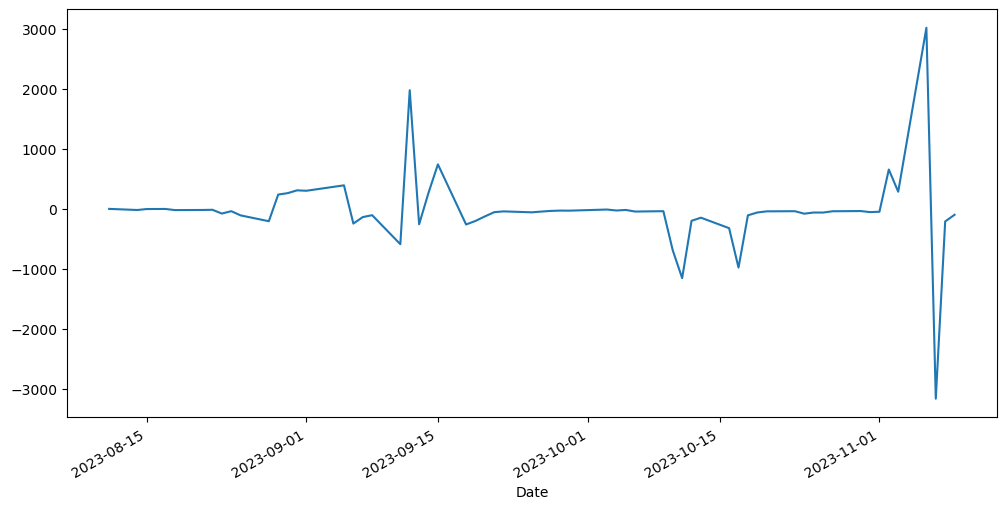

In [115]:
RSIcalc(close_df["ACES"]).plot(figsize=(12, 6))

In [24]:
close_df.diff().head()

,ACES,AMJ,AMLP,AMNA,AMND,AMTR,AMUB,AMZA,ATMP,BNE,...,TPYP,UMI,USAI,VCLN,VDE,VMAT,WNDY,XES,XLE,XOP
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-11,-0.369999,0.240002,0.510002,0.261997,0.305000,0.315998,0.130000,0.259998,0.199999,-0.321999,...,0.091002,0.264000,0.198000,-0.060999,1.769997,-0.149000,-0.330000,0.860001,1.360001,1.739990
2023-08-14,0.049999,-0.140001,-0.130001,-0.321999,-0.263000,-0.328999,-0.083000,-0.119999,-0.139999,-0.217001,...,-0.201000,-0.316002,-0.261002,0.031000,-0.590004,0.167002,0.030000,-1.110001,-0.380005,-1.039993
2023-08-15,-1.330002,-0.209999,-0.459999,-0.455002,-0.469997,-0.560001,-0.112000,-0.419998,-0.150000,-0.515999,...,-0.282001,-0.409000,-0.285000,-0.615002,-2.589996,-0.278002,-0.370000,-1.659996,-1.859993,-2.770004
2023-08-16,-0.610001,0.029999,0.020000,-0.160000,-0.032001,-0.215000,0.007999,0.029999,-0.059999,-0.392000,...,-0.052999,-0.153999,-0.171000,-0.163000,-0.970001,-0.178999,-0.070001,-0.389999,-0.760002,-0.649994


In [76]:
close_df

,ACES,AMJ,AMLP,AMNA,AMND,AMTR,AMUB,AMZA,ATMP,BNE,...,TPYP,UMI,USAI,VCLN,VDE,VMAT,WNDY,XES,XLE,XOP
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-10,43.020000,23.879999,40.259998,37.851002,38.785999,50.409000,15.061000,33.410000,20.940001,25.219999,...,25.389999,35.624001,27.950001,19.511000,123.910004,27.087999,14.850,93.779999,88.540001,147.070007
2023-08-11,42.650002,24.120001,40.770000,38.112999,39.091000,50.724998,15.191000,33.669998,21.139999,24.898001,...,25.481001,35.888000,28.148001,19.450001,125.680000,26.938999,14.520,94.639999,89.900002,148.809998
2023-08-14,42.700001,23.980000,40.639999,37.791000,38.827999,50.396000,15.108000,33.549999,21.000000,24.681000,...,25.280001,35.571999,27.886999,19.481001,125.089996,27.106001,14.550,93.529999,89.519997,147.770004
2023-08-15,41.369999,23.770000,40.180000,37.335999,38.358002,49.835999,14.996000,33.130001,20.850000,24.165001,...,24.997999,35.162998,27.601999,18.865999,122.500000,26.827999,14.180,91.870003,87.660004,145.000000
2023-08-16,40.759998,23.799999,40.200001,37.175999,38.326000,49.620998,15.004000,33.160000,20.790001,23.773001,...,24.945000,35.008999,27.431000,18.702999,121.529999,26.649000,14.110,91.480003,86.900002,144.350006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,32.099998,25.700001,43.720001,38.305000,39.908001,51.778999,16.195000,36.009998,21.700001,20.941000,...,25.480000,36.428001,28.219999,16.389999,122.190002,26.591000,12.490,90.129997,86.680000,147.619995
2023-11-06,31.170000,25.559999,43.340000,38.021000,39.640999,51.391998,16.089001,35.849998,21.549999,20.924999,...,25.230000,36.216000,27.962000,16.232000,120.480003,26.549000,12.490,88.169998,85.699997,143.690002
2023-11-07,31.010000,25.270000,43.029999,37.566002,39.251999,50.772999,15.928000,35.200001,21.320000,20.673000,...,24.950001,35.743000,27.621000,16.054001,117.559998,26.610001,12.305,83.739998,83.800003,139.619995


### ii. Bollinger Bands

In [14]:
test = indicators._bollinger_bands(close_df['AMJ'])
test

,close,sma,Upper Band,Lower Band
Date,,,,
2023-08-10,23.879999,NaN,NaN,NaN
2023-08-11,24.120001,NaN,NaN,NaN
2023-08-14,23.980000,NaN,NaN,NaN
2023-08-15,23.770000,NaN,NaN,NaN
2023-08-16,23.799999,NaN,NaN,NaN
...,...,...,...,...
2023-11-03,25.700001,25.006429,25.507549,24.505309
2023-11-06,25.559999,25.042857,25.591141,24.494573
2023-11-07,25.270000,25.045714,25.596590,24.494839


<Axes: xlabel='Date'>

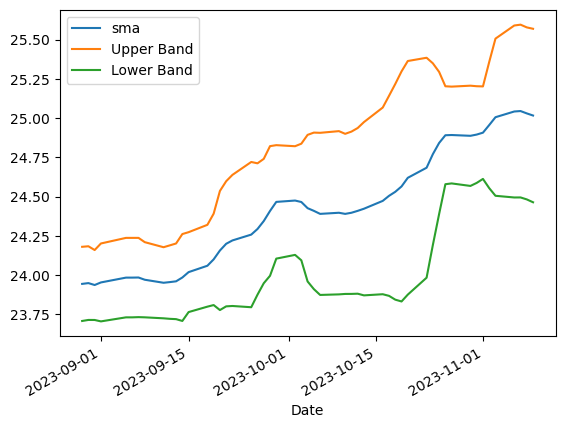

In [15]:
test[['sma', 'Upper Band', 'Lower Band']].plot()

In [16]:
from concurrent.futures import ThreadPoolExecutor

In [17]:
symbols = close_df.columns[:1].to_list()

In [18]:
symbols

['ACES']

In [19]:
pool = ThreadPoolExecutor(max_workers=5)

In [20]:
results = pool.map(indicators._bollinger_bands, symbols)

In [21]:
for res in results:
    print(res.head())
    
pool.shutdown()

AttributeError: 'str' object has no attribute 'rolling'

In [ ]:
# https://superfastpython.com/threadpoolexecutor-in-python/
# SuperFastPython.com
# example of executing a target task function in a separate thread
from time import sleep
from threading import Thread
 
# a simple task that blocks for a moment and prints a message
def task():
    # block for a moment
    sleep(1)
    # display a message
    print('This is coming from another thread')
 
# create and configure a new thread to run a function
thread = Thread(target=task)
# start the task in a new thread
thread.start()
# display a message
print('Waiting for the new thread to finish...')
# wait for the task to complete
thread.join()

In [ ]:
import threading

symbols = close_df.columns[:1].to_list()
print(symbols)

NUM_HILOS = len(symbols)

for num_hilo in range(NUM_HILOS):
    hilo = threading.Thread(name='hilo%s' %num_hilo,
                            target=indicators._bollinger_bands,
                            args=(symbols,))    
    hilo.start()

In [ ]:
# https://stackoverflow.com/questions/7207309/how-to-run-functions-in-parallel

from concurrent.futures import ProcessPoolExecutor

def run_cpu_tasks_in_parallel(tasks):
    with ProcessPoolExecutor() as executor:
        running_tasks = [executor.submit(task) for task in tasks]
        for running_task in running_tasks:
            running_task.result()

In [ ]:
run_cpu_tasks_in_parallel([
        task_1,
        task_2,
    ])

In [81]:
data = close_df.iloc[:, :2]

In [ ]:
# https://superfastpython.com/processpoolexecutor-in-python/
results = pool.map(indicators._bollinger_bands, symbols)